In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Prepare data

In [18]:
df = pd.read_csv('data/IB-Raf1.csv')

total_proteins = df.shape[0]
soluble_with_raf1 = df[df['Rate mean [s-1]'] >0].shape[0]
soluble_without_raf1 = df[(df["soluble_with_raf1"] !=1) & (df['Rate mean [s-1]'] >0)].shape[0]

Plot

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
ax.set_facecolor('none')

ax.barh([0, 1], [soluble_with_raf1, soluble_without_raf1], label="soluble", color="#55b9b1ff")
ax.barh([0, 1], [total_proteins - soluble_with_raf1, total_proteins - soluble_without_raf1],
        left=[soluble_with_raf1, soluble_without_raf1], label="insoluble", color="#e5ededff")

ax.set_yticks([0, 1])
ax.set_yticklabels(["+ Raf1", "- Raf1"])
ax.set_xlabel("# β-cyanobacterial rubisco expressed")
ax.legend(bbox_to_anchor=(1.41, -0.23), loc='lower right')
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

plt.savefig(r'plots/raf1.svg', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

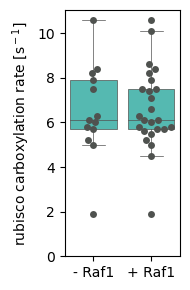

In [20]:
df_without_raf1 = df[(df['soluble_with_raf1'] != 1) & (~df['Rate mean [s-1]'].isna())]
df_with_raf1 = df[~df['Rate mean [s-1]'].isna()]

# Create a new DataFrame for plotting, stacking the two series together
plot_df = pd.DataFrame({
    'Rate mean [s-1]': df_without_raf1['Rate mean [s-1]'].tolist() + df_with_raf1['Rate mean [s-1]'].tolist(),
    'Category': ['- Raf1'] * len(df_without_raf1) + ['+ Raf1'] * len(df_with_raf1)
})


fig, ax = plt.subplots(figsize=(2, 3))
ax.set_facecolor('none')

# Box plots
sns.boxplot(x='Category', y='Rate mean [s-1]', data=plot_df, palette=['#55b9b1ff', '#55b9b1ff'], saturation=1 , linewidth=.5, boxprops=dict(edgecolor='#4f524fff'), showfliers=False, ax=ax)

# Adding dots (individual data points) using swarmplot
sns.swarmplot(x='Category', y='Rate mean [s-1]', data=plot_df, color='#4f524fff', ax=ax)

plt.xlabel('')
plt.ylabel('rubisco carboxylation rate [s$^-$$^1$]')
plt.ylim(0, )  
plt.tight_layout()

fig.savefig(r'plots/carbox_rates_w_o_raf.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()